[View in Colaboratory](https://colab.research.google.com/github/Curiousss/InkerIntern/blob/master/FER_WINO_SEPARABLE_NO_CUDNN.ipynb)

In [1]:
!wget https://github.com/LamUong/FacialExpressionRecognition/blob/master/badtrainingdata.txt

--2018-06-22 10:35:21--  https://github.com/LamUong/FacialExpressionRecognition/blob/master/badtrainingdata.txt
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘badtrainingdata.txt’

badtrainingdata.txt     [ <=>                ]  61.91K   378KB/s    in 0.2s    

2018-06-22 10:35:21 (378 KB/s) - ‘badtrainingdata.txt’ saved [63395]



In [2]:
from google.colab import files
uploaded = files.upload()

Saving fer2013.tar to fer2013.tar


In [3]:
!ls

datalab  fer2013.tar  fer2013.tar.gz


In [42]:
import os
!export TF_ENABLE_WINOGRAD_NONFUSED=1
os.environ['TF_ENABLE_WINOGRAD_NONFUSED'] = '1'
os.environ.pop('TF_ENABLE_WINOGRAD_NONFUSED', None)

'1'

In [3]:
!tar xvf fer2013.tar
!ls

fer2013/fer2013.csv
fer2013/README
fer2013/fer2013.bib
fer2013/
datalab  fer2013  fer2013.tar


In [4]:

import csv
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D, InputLayer
from keras.layers import Convolution2D, SeparableConv2D, MaxPooling2D, BatchNormalization 
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
img_rows, img_cols = 48, 48
batch_size = 128
classes = 7
epoch = 100
img_channels = 1

In [0]:
import csv
f = open('fer2013/fer2013.csv')
csv_f = csv.reader(f)


In [0]:
train_x = []
train_y = []
val_x =[]
val_y =[]

In [0]:
num=0
for row in csv_f:
  #print(row)
  num = num +1
  #print(num)
  temp_list = []
  for pixel in row[1].split( ):
    temp_list.append(int(pixel))

  if str(row[2]) == "Training":
    train_y.append(int(row[0]))
    train_x.append(temp_list) 
  elif str(row[2]) == "PublicTest":
    val_y.append(int(row[0]))
    val_x.append(temp_list)

In [0]:
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
val_x = np.asarray(val_x)
val_y = np.asarray(val_y)

In [0]:
train_x = train_x.reshape(train_x.shape[0], 48, 48)
train_x = train_x.reshape(train_x.shape[0], 48, 48, 1 )
train_y = np_utils.to_categorical(train_y, 7)

In [0]:
val_x = val_x.reshape(val_x.shape[0], 48, 48)
val_x = val_x.reshape(val_x.shape[0], 48, 48, 1)
val_y = np_utils.to_categorical(val_y, 7)

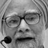

In [14]:
from PIL import Image

#print(train_x.shape)

showimg = train_x[1].reshape(48,48)
img = Image.fromarray(showimg.astype('uint8'))
from IPython.display import display
display(img)

In [0]:
train_x = train_x.astype('float32')
train_x = train_x / 255.0
val_x = val_x.astype('float32')
val_x = val_x / 255.0
train_x = train_x - 0.5
train_x = train_x * 2
val_x = val_x - 0.5
val_x = val_x * 2


In [0]:
input_shape = (img_rows, img_cols, img_channels)
model = Sequential()
model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), padding='same',
                            name='image_array', input_shape=input_shape))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.25))

model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.25))

model.add(SeparableConv2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.25))

model.add(SeparableConv2D(filters=512, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=512, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.25))

#model.add(Flatten())
'''
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(.5))

model.add(Dense(2048))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(.5))
'''
model.add(InputLayer(input_shape=(3, 3, 1024)))
model.add(GlobalAveragePooling2D())
model.add(Dense(7))
model.add(Activation('softmax'))

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (SeparableConv2D (None, 48, 48, 64)        137       
_________________________________________________________________
batch_normalization_27 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
leaky_re_lu_27 (LeakyReLU)   (None, 48, 48, 64)        0         
_________________________________________________________________
separable_conv2d_22 (Separab (None, 48, 48, 64)        4736      
_________________________________________________________________
batch_normalization_28 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
leaky_re_lu_28 (LeakyReLU)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 64)        0         
__________

In [0]:
model.compile(optimizer='Adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
filepath='Model.best.hdf5'
checkpointer = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')


In [0]:
model.load_weights('Model.best.hdf5')

In [22]:
# LReLU
import time
start_time = time.time()

model.fit(train_x, train_y, epochs=50, batch_size=batch_size, validation_data=(val_x, val_y), callbacks=[checkpointer])
print("--- %s seconds ---" % (time.time() - start_time))

Train on 28709 samples, validate on 3589 samples
Epoch 1/50
28709/28709 [==============================] - 53s 2ms/step - loss: 0.4090 - acc: 0.8515 - val_loss: 1.2423 - val_acc: 0.6330

Epoch 00001: val_acc did not improve from 0.63918
Epoch 2/50
25856/28709 [==========================>...] - ETA: 5s - loss: 0.4142 - acc: 0.8503

28709/28709 [==============================] - 53s 2ms/step - loss: 0.4188 - acc: 0.8481 - val_loss: 1.2831 - val_acc: 0.6325

Epoch 00002: val_acc did not improve from 0.63918
Epoch 3/50
28709/28709 [==============================] - 53s 2ms/step - loss: 0.4061 - acc: 0.8503 - val_loss: 1.3161 - val_acc: 0.6364

Epoch 00003: val_acc did not improve from 0.63918
Epoch 4/50
 9984/28709 [=========>....................] - ETA: 33s - loss: 0.3785 - acc: 0.8617

28709/28709 [==============================] - 53s 2ms/step - loss: 0.3902 - acc: 0.8598 - val_loss: 1.2826 - val_acc: 0.6459

Epoch 00004: val_acc improved from 0.63918 to 0.64586, saving model to Model.best.hdf5
Epoch 5/50
28709/28709 [==============================] - 53s 2ms/step - loss: 0.3885 - acc: 0.8585 - val_loss: 1.3070 - val_acc: 0.6400

Epoch 00005: val_acc did not improve from 0.64586
Epoch 6/50
 4480/28709 [===>..........................] - ETA: 43s - loss: 0.3332 - acc: 0.8835

28709/28709 [==============================] - 53s 2ms/step - loss: 0.3873 - acc: 0.8579 - val_loss: 1.2978 - val_acc: 0.6428

Epoch 00006: val_acc did not improve from 0.64586
Epoch 7/50
28709/28709 [==============================] - 53s 2ms/step - loss: 0.3801 - acc: 0.8630 - val_loss: 1.3513 - val_acc: 0.6233

Epoch 00007: val_acc did not improve from 0.64586
Epoch 8/50
 6144/28709 [=====>........................] - ETA: 40s - loss: 0.3556 - acc: 0.8722

28709/28709 [==============================] - 54s 2ms/step - loss: 0.3744 - acc: 0.8636 - val_loss: 1.2889 - val_acc: 0.6261

Epoch 00008: val_acc did not improve from 0.64586
Epoch 9/50
28709/28709 [==============================] - 53s 2ms/step - loss: 0.3630 - acc: 0.8674 - val_loss: 1.3062 - val_acc: 0.6286

Epoch 00009: val_acc did not improve from 0.64586
Epoch 10/50
 6400/28709 [=====>........................] - ETA: 39s - loss: 0.3345 - acc: 0.8784

28709/28709 [==============================] - 53s 2ms/step - loss: 0.3601 - acc: 0.8684 - val_loss: 1.3542 - val_acc: 0.6317

Epoch 00010: val_acc did not improve from 0.64586
Epoch 11/50
28709/28709 [==============================] - 53s 2ms/step - loss: 0.3534 - acc: 0.8725 - val_loss: 1.2838 - val_acc: 0.6305

Epoch 00011: val_acc did not improve from 0.64586
Epoch 12/50
 6400/28709 [=====>........................] - ETA: 39s - loss: 0.3247 - acc: 0.8833

28709/28709 [==============================] - 53s 2ms/step - loss: 0.3509 - acc: 0.8736 - val_loss: 1.3151 - val_acc: 0.6361

Epoch 00012: val_acc did not improve from 0.64586
Epoch 13/50
28709/28709 [==============================] - 53s 2ms/step - loss: 0.3357 - acc: 0.8792 - val_loss: 1.3200 - val_acc: 0.6322

Epoch 00013: val_acc did not improve from 0.64586
Epoch 14/50
 6400/28709 [=====>........................] - ETA: 39s - loss: 0.3117 - acc: 0.8888

28709/28709 [==============================] - 53s 2ms/step - loss: 0.3392 - acc: 0.8783 - val_loss: 1.3274 - val_acc: 0.6347

Epoch 00014: val_acc did not improve from 0.64586
Epoch 15/50
28709/28709 [==============================] - 53s 2ms/step - loss: 0.3302 - acc: 0.8816 - val_loss: 1.3517 - val_acc: 0.6330

Epoch 00015: val_acc did not improve from 0.64586
Epoch 16/50
 6400/28709 [=====>........................] - ETA: 39s - loss: 0.3312 - acc: 0.8833

28709/28709 [==============================] - 53s 2ms/step - loss: 0.3355 - acc: 0.8774 - val_loss: 1.3069 - val_acc: 0.6378

Epoch 00016: val_acc did not improve from 0.64586
Epoch 17/50
28709/28709 [==============================] - 53s 2ms/step - loss: 0.3313 - acc: 0.8793 - val_loss: 1.4117 - val_acc: 0.6116

Epoch 00017: val_acc did not improve from 0.64586
Epoch 18/50
 6400/28709 [=====>........................] - ETA: 39s - loss: 0.2993 - acc: 0.8980

28709/28709 [==============================] - 53s 2ms/step - loss: 0.3222 - acc: 0.8853 - val_loss: 1.3283 - val_acc: 0.6319

Epoch 00018: val_acc did not improve from 0.64586
Epoch 19/50
28709/28709 [==============================] - 53s 2ms/step - loss: 0.3185 - acc: 0.8866 - val_loss: 1.3535 - val_acc: 0.6417

Epoch 00019: val_acc did not improve from 0.64586
Epoch 20/50
 6400/28709 [=====>........................] - ETA: 39s - loss: 0.3040 - acc: 0.8945

28709/28709 [==============================] - 53s 2ms/step - loss: 0.3123 - acc: 0.8881 - val_loss: 1.3593 - val_acc: 0.6280

Epoch 00020: val_acc did not improve from 0.64586
Epoch 21/50
28709/28709 [==============================] - 53s 2ms/step - loss: 0.3069 - acc: 0.8906 - val_loss: 1.3849 - val_acc: 0.6317

Epoch 00021: val_acc did not improve from 0.64586
Epoch 22/50
 6400/28709 [=====>........................] - ETA: 39s - loss: 0.2814 - acc: 0.8989

28709/28709 [==============================] - 53s 2ms/step - loss: 0.3052 - acc: 0.8898 - val_loss: 1.5325 - val_acc: 0.6269

Epoch 00022: val_acc did not improve from 0.64586
Epoch 23/50
28709/28709 [==============================] - 53s 2ms/step - loss: 0.2980 - acc: 0.8939 - val_loss: 1.3976 - val_acc: 0.6308

Epoch 00023: val_acc did not improve from 0.64586
Epoch 24/50
 6400/28709 [=====>........................] - ETA: 40s - loss: 0.2782 - acc: 0.9005

28709/28709 [==============================] - 53s 2ms/step - loss: 0.2977 - acc: 0.8935 - val_loss: 1.3619 - val_acc: 0.6255

Epoch 00024: val_acc did not improve from 0.64586
Epoch 25/50
28709/28709 [==============================] - 53s 2ms/step - loss: 0.2933 - acc: 0.8940 - val_loss: 1.3774 - val_acc: 0.6344

Epoch 00025: val_acc did not improve from 0.64586
Epoch 26/50
 6400/28709 [=====>........................] - ETA: 39s - loss: 0.2701 - acc: 0.9034

28709/28709 [==============================] - 53s 2ms/step - loss: 0.2896 - acc: 0.8944 - val_loss: 1.4898 - val_acc: 0.6289

Epoch 00026: val_acc did not improve from 0.64586
Epoch 27/50
28709/28709 [==============================] - 53s 2ms/step - loss: 0.2816 - acc: 0.8966 - val_loss: 1.4039 - val_acc: 0.6403

Epoch 00027: val_acc did not improve from 0.64586
Epoch 28/50
 6400/28709 [=====>........................] - ETA: 39s - loss: 0.2799 - acc: 0.8989

28709/28709 [==============================] - 53s 2ms/step - loss: 0.2898 - acc: 0.8969 - val_loss: 1.4466 - val_acc: 0.6333

Epoch 00028: val_acc did not improve from 0.64586
Epoch 29/50
28709/28709 [==============================] - 53s 2ms/step - loss: 0.2924 - acc: 0.8942 - val_loss: 1.4032 - val_acc: 0.6367

Epoch 00029: val_acc did not improve from 0.64586
Epoch 30/50
 6400/28709 [=====>........................] - ETA: 39s - loss: 0.2715 - acc: 0.9012

28709/28709 [==============================] - 53s 2ms/step - loss: 0.2839 - acc: 0.8981 - val_loss: 1.3977 - val_acc: 0.6408

Epoch 00030: val_acc did not improve from 0.64586
Epoch 31/50
28709/28709 [==============================] - 53s 2ms/step - loss: 0.2837 - acc: 0.8972 - val_loss: 1.4155 - val_acc: 0.6428

Epoch 00031: val_acc did not improve from 0.64586
Epoch 32/50
 6400/28709 [=====>........................] - ETA: 39s - loss: 0.2496 - acc: 0.9128

28709/28709 [==============================] - 53s 2ms/step - loss: 0.2702 - acc: 0.9049 - val_loss: 1.4398 - val_acc: 0.6330

Epoch 00032: val_acc did not improve from 0.64586
Epoch 33/50
28709/28709 [==============================] - 54s 2ms/step - loss: 0.2656 - acc: 0.9044 - val_loss: 1.4292 - val_acc: 0.6297

Epoch 00033: val_acc did not improve from 0.64586
Epoch 34/50
 6400/28709 [=====>........................] - ETA: 40s - loss: 0.2417 - acc: 0.9113

28709/28709 [==============================] - 53s 2ms/step - loss: 0.2696 - acc: 0.9019 - val_loss: 1.4091 - val_acc: 0.6286

Epoch 00034: val_acc did not improve from 0.64586
Epoch 35/50
28709/28709 [==============================] - 53s 2ms/step - loss: 0.2707 - acc: 0.9033 - val_loss: 1.4092 - val_acc: 0.6425

Epoch 00035: val_acc did not improve from 0.64586
Epoch 36/50
 6400/28709 [=====>........................] - ETA: 39s - loss: 0.2490 - acc: 0.9137

28709/28709 [==============================] - 53s 2ms/step - loss: 0.2628 - acc: 0.9056 - val_loss: 1.5396 - val_acc: 0.6216

Epoch 00036: val_acc did not improve from 0.64586
Epoch 37/50
28709/28709 [==============================] - 53s 2ms/step - loss: 0.2667 - acc: 0.9033 - val_loss: 1.4604 - val_acc: 0.6314

Epoch 00037: val_acc did not improve from 0.64586
Epoch 38/50
 6400/28709 [=====>........................] - ETA: 39s - loss: 0.2448 - acc: 0.9144

28709/28709 [==============================] - 53s 2ms/step - loss: 0.2574 - acc: 0.9082 - val_loss: 1.4655 - val_acc: 0.6386

Epoch 00038: val_acc did not improve from 0.64586
Epoch 39/50
28709/28709 [==============================] - 53s 2ms/step - loss: 0.2571 - acc: 0.9091 - val_loss: 1.5333 - val_acc: 0.6378

Epoch 00039: val_acc did not improve from 0.64586
Epoch 40/50
 6400/28709 [=====>........................] - ETA: 39s - loss: 0.2526 - acc: 0.9069

28709/28709 [==============================] - 53s 2ms/step - loss: 0.2545 - acc: 0.9086 - val_loss: 1.4744 - val_acc: 0.6358

Epoch 00040: val_acc did not improve from 0.64586
Epoch 41/50
28709/28709 [==============================] - 53s 2ms/step - loss: 0.2510 - acc: 0.9101 - val_loss: 1.4976 - val_acc: 0.6319

Epoch 00041: val_acc did not improve from 0.64586
Epoch 42/50
 6400/28709 [=====>........................] - ETA: 39s - loss: 0.2374 - acc: 0.9178

28709/28709 [==============================] - 53s 2ms/step - loss: 0.2501 - acc: 0.9110 - val_loss: 1.4443 - val_acc: 0.6358

Epoch 00042: val_acc did not improve from 0.64586
Epoch 43/50
28709/28709 [==============================] - 53s 2ms/step - loss: 0.2474 - acc: 0.9130 - val_loss: 1.5598 - val_acc: 0.6291

Epoch 00043: val_acc did not improve from 0.64586
Epoch 44/50
 6400/28709 [=====>........................] - ETA: 39s - loss: 0.2251 - acc: 0.9223

28709/28709 [==============================] - 53s 2ms/step - loss: 0.2428 - acc: 0.9138 - val_loss: 1.4691 - val_acc: 0.6339

Epoch 00044: val_acc did not improve from 0.64586
Epoch 45/50
28709/28709 [==============================] - 53s 2ms/step - loss: 0.2435 - acc: 0.9140 - val_loss: 1.5082 - val_acc: 0.6378

Epoch 00045: val_acc did not improve from 0.64586
Epoch 46/50
 6400/28709 [=====>........................] - ETA: 39s - loss: 0.2304 - acc: 0.9177

28709/28709 [==============================] - 53s 2ms/step - loss: 0.2380 - acc: 0.9154 - val_loss: 1.4654 - val_acc: 0.6411

Epoch 00046: val_acc did not improve from 0.64586
Epoch 47/50
28709/28709 [==============================] - 53s 2ms/step - loss: 0.2344 - acc: 0.9168 - val_loss: 1.4999 - val_acc: 0.6406

Epoch 00047: val_acc did not improve from 0.64586
Epoch 48/50
 6400/28709 [=====>........................] - ETA: 39s - loss: 0.2232 - acc: 0.9225

28709/28709 [==============================] - 53s 2ms/step - loss: 0.2366 - acc: 0.9157 - val_loss: 1.4765 - val_acc: 0.6453

Epoch 00048: val_acc did not improve from 0.64586
Epoch 49/50
28709/28709 [==============================] - 53s 2ms/step - loss: 0.2402 - acc: 0.9148 - val_loss: 1.5056 - val_acc: 0.6417

Epoch 00049: val_acc did not improve from 0.64586
Epoch 50/50
 6400/28709 [=====>........................] - ETA: 39s - loss: 0.2144 - acc: 0.9259

28709/28709 [==============================] - 53s 2ms/step - loss: 0.2343 - acc: 0.9174 - val_loss: 1.5180 - val_acc: 0.6333

Epoch 00050: val_acc did not improve from 0.64586
--- 2664.325827598572 seconds ---


In [50]:
# input normalized
import time
start_time = time.time()

model.fit(train_x, train_y, epochs=10, batch_size=batch_size, validation_data=(val_x, val_y))
print("--- %s seconds ---" % (time.time() - start_time))

Train on 28709 samples, validate on 3589 samples
Epoch 1/10
28709/28709 [==============================] - 162s 6ms/step - loss: 2.0189 - acc: 0.2407 - val_loss: 1.8390 - val_acc: 0.2856
Epoch 2/10
28709/28709 [==============================] - 156s 5ms/step - loss: 1.8329 - acc: 0.2909 - val_loss: 1.7546 - val_acc: 0.3391
Epoch 3/10
  896/28709 [..............................] - ETA: 2:27 - loss: 1.7662 - acc: 0.3058

28709/28709 [==============================] - 157s 5ms/step - loss: 1.7695 - acc: 0.3230 - val_loss: 1.8986 - val_acc: 0.3093
Epoch 4/10
28709/28709 [==============================] - 157s 5ms/step - loss: 1.7122 - acc: 0.3484 - val_loss: 1.6657 - val_acc: 0.3611
Epoch 5/10
10880/28709 [==========>...................] - ETA: 1:34 - loss: 1.6901 - acc: 0.3509

28709/28709 [==============================] - 156s 5ms/step - loss: 1.6773 - acc: 0.3604 - val_loss: 1.7014 - val_acc: 0.3494
Epoch 6/10
28709/28709 [==============================] - 156s 5ms/step - loss: 1.6553 - acc: 0.3702 - val_loss: 1.6194 - val_acc: 0.3859
Epoch 7/10
13312/28709 [============>.................] - ETA: 1:20 - loss: 1.6141 - acc: 0.3857

28709/28709 [==============================] - 156s 5ms/step - loss: 1.6129 - acc: 0.3857 - val_loss: 1.6001 - val_acc: 0.3923
Epoch 8/10
28709/28709 [==============================] - 156s 5ms/step - loss: 1.5920 - acc: 0.3924 - val_loss: 1.6594 - val_acc: 0.4035
Epoch 9/10
13824/28709 [=============>................] - ETA: 1:18 - loss: 1.5641 - acc: 0.4065

28709/28709 [==============================] - 157s 5ms/step - loss: 1.5559 - acc: 0.4044 - val_loss: 1.5507 - val_acc: 0.4113
Epoch 10/10
28709/28709 [==============================] - 157s 5ms/step - loss: 1.5341 - acc: 0.4100 - val_loss: 1.5732 - val_acc: 0.4068
--- 1574.3259291648865 seconds ---


In [27]:

import time
start_time = time.time()

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=40,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(train_x)

model.fit_generator(datagen.flow(train_x, train_y,
                    batch_size=batch_size),
                    steps_per_epoch=(train_x.shape[0]/batch_size),
                    epochs=40,
                    validation_data=(val_x, val_y),
                    callbacks=[checkpointer])
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/40
225/224 [==============================] - 53s 238ms/step - loss: 0.7136 - acc: 0.7365 - val_loss: 1.0975 - val_acc: 0.6250

Epoch 00001: val_acc did not improve from 0.66620
Epoch 2/40
225/224 [==============================] - 53s 237ms/step - loss: 0.7118 - acc: 0.7370 - val_loss: 1.0709 - val_acc: 0.6389

Epoch 00002: val_acc did not improve from 0.66620
Epoch 3/40
 35/224 [===>..........................] - ETA: 43s - loss: 0.7074 - acc: 0.7402

225/224 [==============================] - 53s 237ms/step - loss: 0.7089 - acc: 0.7359 - val_loss: 1.1774 - val_acc: 0.6222

Epoch 00003: val_acc did not improve from 0.66620
Epoch 4/40
225/224 [==============================] - 53s 238ms/step - loss: 0.7049 - acc: 0.7419 - val_loss: 1.1248 - val_acc: 0.6199

Epoch 00004: val_acc did not improve from 0.66620
Epoch 5/40
 53/224 [======>.......................] - ETA: 39s - loss: 0.6867 - acc: 0.7447

225/224 [==============================] - 53s 238ms/step - loss: 0.7037 - acc: 0.7389 - val_loss: 1.1265 - val_acc: 0.6414

Epoch 00005: val_acc did not improve from 0.66620
Epoch 6/40
225/224 [==============================] - 53s 238ms/step - loss: 0.6908 - acc: 0.7450 - val_loss: 1.1278 - val_acc: 0.6278

Epoch 00006: val_acc did not improve from 0.66620
Epoch 7/40
 56/224 [======>.......................] - ETA: 38s - loss: 0.6743 - acc: 0.7496

225/224 [==============================] - 53s 238ms/step - loss: 0.7020 - acc: 0.7401 - val_loss: 1.1141 - val_acc: 0.6342

Epoch 00007: val_acc did not improve from 0.66620
Epoch 8/40
225/224 [==============================] - 53s 238ms/step - loss: 0.6988 - acc: 0.7418 - val_loss: 1.1618 - val_acc: 0.6305

Epoch 00008: val_acc did not improve from 0.66620
Epoch 9/40
 57/224 [======>.......................] - ETA: 38s - loss: 0.6754 - acc: 0.7504

225/224 [==============================] - 53s 238ms/step - loss: 0.6961 - acc: 0.7418 - val_loss: 1.0884 - val_acc: 0.6400

Epoch 00009: val_acc did not improve from 0.66620
Epoch 10/40
225/224 [==============================] - 53s 237ms/step - loss: 0.6935 - acc: 0.7449 - val_loss: 1.1576 - val_acc: 0.6269

Epoch 00010: val_acc did not improve from 0.66620
Epoch 11/40
 56/224 [======>.......................] - ETA: 38s - loss: 0.6759 - acc: 0.7532

225/224 [==============================] - 53s 237ms/step - loss: 0.6907 - acc: 0.7475 - val_loss: 1.0907 - val_acc: 0.6383

Epoch 00011: val_acc did not improve from 0.66620
Epoch 12/40
225/224 [==============================] - 53s 237ms/step - loss: 0.6876 - acc: 0.7454 - val_loss: 1.1936 - val_acc: 0.6330

Epoch 00012: val_acc did not improve from 0.66620
Epoch 13/40
 56/224 [======>.......................] - ETA: 38s - loss: 0.6891 - acc: 0.7420

225/224 [==============================] - 53s 238ms/step - loss: 0.6881 - acc: 0.7445 - val_loss: 1.1908 - val_acc: 0.6211

Epoch 00013: val_acc did not improve from 0.66620
Epoch 14/40
225/224 [==============================] - 53s 237ms/step - loss: 0.6708 - acc: 0.7547 - val_loss: 1.0958 - val_acc: 0.6512

Epoch 00014: val_acc did not improve from 0.66620
Epoch 15/40
 56/224 [======>.......................] - ETA: 38s - loss: 0.6587 - acc: 0.7559

225/224 [==============================] - 53s 237ms/step - loss: 0.6811 - acc: 0.7468 - val_loss: 1.1395 - val_acc: 0.6322

Epoch 00015: val_acc did not improve from 0.66620
Epoch 16/40
225/224 [==============================] - 53s 237ms/step - loss: 0.6718 - acc: 0.7537 - val_loss: 1.0924 - val_acc: 0.6528

Epoch 00016: val_acc did not improve from 0.66620
Epoch 17/40
 56/224 [======>.......................] - ETA: 38s - loss: 0.6602 - acc: 0.7561

225/224 [==============================] - 54s 239ms/step - loss: 0.6761 - acc: 0.7523 - val_loss: 1.0877 - val_acc: 0.6612

Epoch 00017: val_acc did not improve from 0.66620
Epoch 18/40
225/224 [==============================] - 54s 238ms/step - loss: 0.6809 - acc: 0.7497 - val_loss: 1.0894 - val_acc: 0.6475

Epoch 00018: val_acc did not improve from 0.66620
Epoch 19/40
 56/224 [======>.......................] - ETA: 38s - loss: 0.6566 - acc: 0.7617

225/224 [==============================] - 53s 237ms/step - loss: 0.6728 - acc: 0.7519 - val_loss: 1.0590 - val_acc: 0.6537

Epoch 00019: val_acc did not improve from 0.66620
Epoch 20/40
225/224 [==============================] - 53s 238ms/step - loss: 0.6598 - acc: 0.7576 - val_loss: 1.1118 - val_acc: 0.6364

Epoch 00020: val_acc did not improve from 0.66620
Epoch 21/40
 56/224 [======>.......................] - ETA: 38s - loss: 0.6536 - acc: 0.7545

225/224 [==============================] - 53s 237ms/step - loss: 0.6662 - acc: 0.7549 - val_loss: 1.0514 - val_acc: 0.6520

Epoch 00021: val_acc did not improve from 0.66620
Epoch 22/40
104/224 [============>.................] - ETA: 27s - loss: 0.6408 - acc: 0.7664

KeyboardInterrupt: ignored